# Laboratorio #1 Física de Campos 

In [23]:
using Plots, LinearAlgebra, DataFrames

#### **Constantes físicas**

In [24]:
g = 9.8

9.8

#### **Valores conocidos**

In [25]:
m = 93.34e-3 #masa del cuerpo sostenido en gramos [kg]
m_cuerda = 0.85e-3 #masa de la cuerda en gramos [kg]
Δm = 0.01e-3 #error de la balanza en gramos [kg]
println("mass of body: $m --- mass of rope: $m_cuerda --- error in mass measure: $Δm")

ξ₀ = 3e-2 #Amplitud de la onda en metros [m]
println("wave amplitude: $ξ₀")

L_total = (113.9 + 4.9 + 3.5 + 4.0 + 5.0 + 0.4)*1e-2 #Longitud de la cuerda total en metros [m]
L = 76.45e-2 #Longitud de la cuerda oscilante en metros [m]
ΔL = (sqrt((L + 0.1e-2)^2 + ξ₀^2)-L)/L #error de la distancia medida en metros [m]
println("total length of rope: $L_total --- oscilating length: $L --- error in length meassurement: $ΔL")

T = m*g #Tensión en newtons [N] 
ΔT = Δm*g #Error de la tensión en N
println("Tension: $T --- error in tension meassurement: $ΔT")

frec_fund = 26.1 #Frecuencia fundamental de la cuerda en Hertz [Hz]
Δf = 0.1 #Error de medición de la frecuencia en Hertz [Hz]
println("fundamental frequency: $frec_fund --- error in frequency meassurement: $Δf")

μ = m_cuerda/L_total #Densidad teórica con respecto a los valores obtenidos
Δμ = sqrt((Δm/2m)^2+(ΔL/L)^2)
println("lineal density of the rope: $μ --- error in meassurement of linear density: $Δμ")


mass of body: 0.09334 --- mass of rope: 0.00085 --- error in mass measure: 1.0e-5
wave amplitude: 0.03
total length of rope: 1.3170000000000002 --- oscilating length: 0.7645 --- error in length meassurement: 0.00207668480889516
Tension: 0.9147320000000001 --- error in tension meassurement: 9.800000000000001e-5
fundamental frequency: 26.1 --- error in frequency meassurement: 0.1
lineal density of the rope: 0.0006454062262718298 --- error in meassurement of linear density: 0.0027169242153974433


## **Reporte de laboratorio**

In [26]:
fs = [26.1 51.2 78.3]
println("frecuencies [Hz]: ", fs)
λ(n) = 2L/n
λs = round.(λ.(1:3), digits = 4)
Δλ(n) = 2Δf/n
Δλs = Δλ.(1:3)
println("wave lengths [m]: ", λs)
velocities = [fs[i] * λs[i] for i in 1:3]
println("velocities [m/s]: ", round.(velocities, digits = 3))
Δv = sqrt((Δf/fs[1])^2+(Δλs[1]/λs[1])^2)
print("error for velocity measurements: $(round(Δv, digits = 3))")

frecuencies [Hz]: [26.1 51.2 78.3]
wave lengths [m]: [1.529, 0.7645, 0.5097]
velocities [m/s]: [39.907, 39.142, 39.91]
error for velocity measurements: 0.131

In [27]:
v = sqrt(T/μ)
Δv_ = 1/2*sqrt((ΔT/T)^2+(Δμ/μ)^2)
println("velocity [m/s]: $v --- error for velocity meassurement: $Δv_ ")

velocity [m/s]: 37.64699884921694 --- error for velocity meassurement: 2.1048171722571967 


In [28]:
masses = [93.28, 83.51, 63.51, 42.95] 
#println("masses used: ", masses)
f_masses = [26.1, 25.2, 22.8, 20.0]
#println("fundamental frequencies: ", f_masses)
Ts = g .* masses
#println("Tensions: ", round.(Ts, digits = 2))
f²_masses = f_masses .^ 2
#println("squared fundamental frequencies: ", round.(f²_masses, digits=2))
df = DataFrame(masses = masses, f = f_masses, T = Ts, f_squared = f²_masses)

Row,masses,f,T,f_squared
,Float64,Float64,Float64,Float64
1,93.28,26.1,914.144,681.21
2,83.51,25.2,818.398,635.04
3,63.51,22.8,622.398,519.84
4,42.95,20.0,420.91,400.0


f²(x)=0.575 T + 160.026


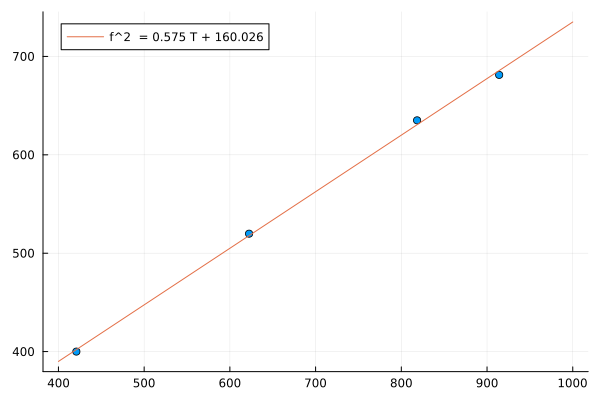

In [41]:
A = [Ts ones(length(Ts))] #Matrix of coeffitients 
b = f²_masses#Matrix of results
sol = A\b #Minimmum squares solution
T_ = 400:1:1000 #Domain evaluation for tension (T)
T = maximum(T_)
println("f²(x)=$(round(sol[1], digits = 3)) T + $(round(sol[2], digits = 3))")
f²(T) = sol[1]*T + sol[2] #Linear function for f²(T) = mT + c
scatter(Ts, f²_masses, label = false)
plot!(T_, f².(T_), label = "f^2  = 0.575 T + 160.026")

In [40]:
μ_theoretical = T/(λ(1)^2*f²(T)^2)

println("obtained μ with squared root formula: $μ --- obtained μ with linear regression: $μ_theoretical")
error_ = abs(μ-μ_theoretical)/μ
println("Error relativo de μ: $error_")

obtained μ with squared root formula: 0.0006454062262718298 --- obtained μ with linear regression: 0.0007918336550265441
Error relativo de μ: 0.22687638078818684


### **Animaciones de frecuencias armónicas**

[ Info: Saved animation to c:\Users\LocalBoss\Main\ESTUDIO\SEMESTER 4\FISICA DE ONDAS\LABORATORIOS\tmp.gif


Plots.AnimatedGif("c:\\Users\\LocalBoss\\Main\\ESTUDIO\\SEMESTER 4\\FISICA DE ONDAS\\LABORATORIOS\\tmp.gif")
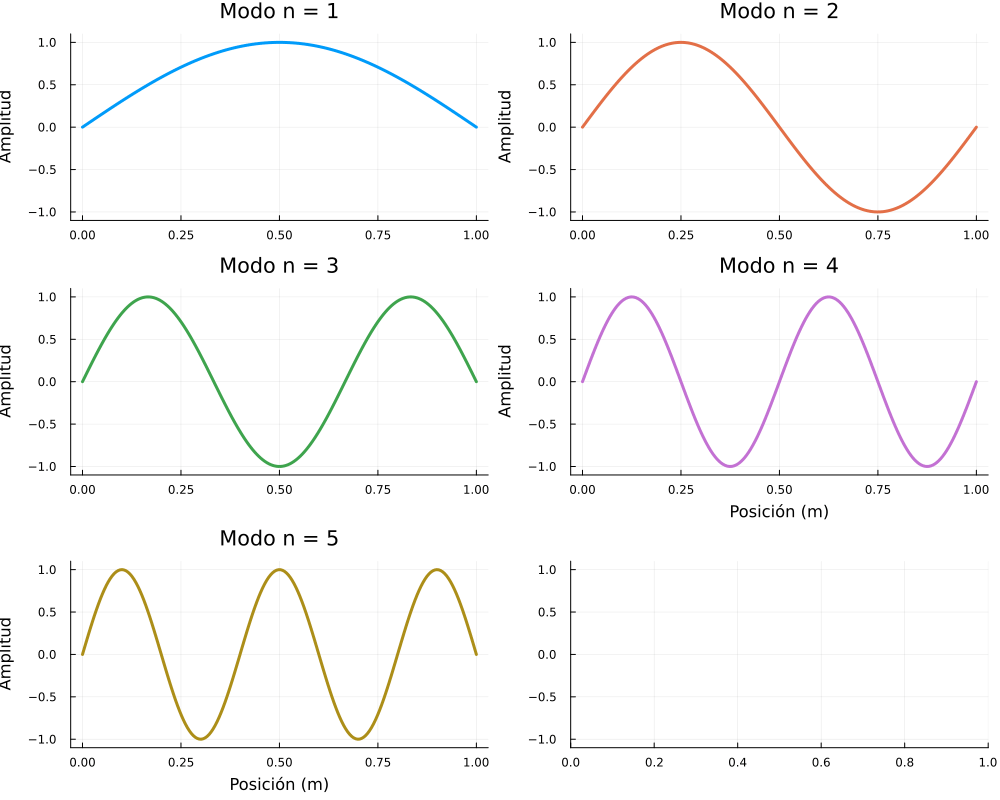

In [50]:
using Plots, LinearAlgebra, Printf

# Parámetros físicos
L = 1.0         # Longitud de la cuerda (m)
c = 1.0         # Velocidad de propagación (m/s)
T = 2π          # Periodo total de animación (s)
n_points = 200  # Puntos de discretización espacial
n_frames = 100  # Número de frames de animación

# Preparar datos
x = range(0, L, length=n_points)
t = range(0, T, length=n_frames)
modos = 1:5     # Modos armónicos a visualizar

# Función para calcular desplazamiento de la cuerda
function desplazamiento(x, t, n, L, c)
    ω_n = n * π * c / L      # Frecuencia angular
    return sin.(n * π * x / L) * cos(ω_n * t)
end

# Pre-calcular todos los modos
y_modos = zeros(length(modos), n_points, n_frames)
for (i, n) in enumerate(modos)
    for j in eachindex(t)
        y_modos[i, :, j] = desplazamiento(x, t[j], n, L, c)
    end
end

# Normalizar superposición
y_superposicion ./= maximum(abs.(y_superposicion))

# Crear animación
anim = @gif for j in eachindex(t)
    p = plot(layout=(3, 2), size=(1000, 800),
             legend=false, ylims=(-1.1, 1.1))
    
    # Plotear modos individuales
    for (i, n) in enumerate(modos)
        plot!(p[i], x, y_modos[i, :, j], 
              linewidth=3, color=i,
              title="Modo n = $n",
              xlabel=(i > 3 ? "Posición (m)" : ""),
              ylabel="Amplitud")
    end

end

# Mostrar animación
anim